In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE

from sklearn.ensemble import RandomForestClassifier

import xgboost as xgb
from xgboost import XGBClassifier

from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
from sklearn.metrics import roc_curve, precision_recall_curve
from sklearn.metrics import precision_score, recall_score, f1_score

A) LOADING THE DATASET

In [2]:
#Loadng the dataset
data = pd.read_csv(r"C:\Users\ADMIN\Desktop\Projects\fraud_detection\creditcard.csv")
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
data.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [4]:
df = data.copy()
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


B) EXPLORATORY DATA ANALYSIS

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
#Checking the values in the 'Class' column, 0 = not fraud, 1 = fraud
df['Class'].unique()

array([0, 1])

In [8]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

The values above shows a highly imbalanced data set

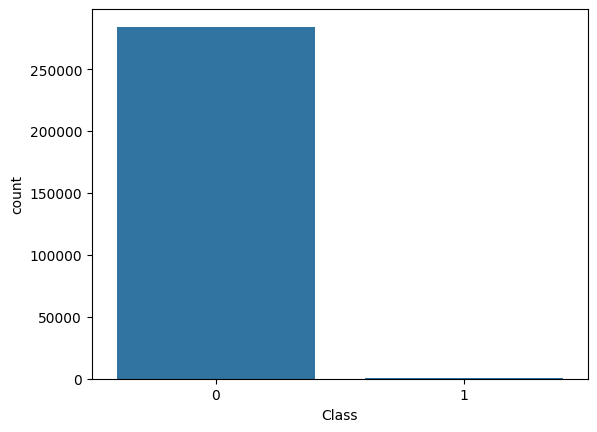

In [9]:
#Checking for imbalance in the class column and visualizing it
sns.countplot(x='Class', data=df)
plt.show()

In [10]:
df.dtypes

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object

C) FEATURE ENGINEERING

1. Feature Creation

In [11]:
#Splitting the data into train and test sets
X = df.drop('Class', axis=1)
Y = df['Class']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(227845, 30) (227845,)
(56962, 30) (56962,)


In [12]:
#Creating a new feature 'Hour' from the 'Time' column to see what time the frauds apply.
X_train['Hour'] = (X_train['Time'] // 3600) % 24
X_test['Hour'] = (X_test['Time'] // 3600) % 24
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Hour
223361,143352.0,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,...,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,9.99,15.0
165061,117173.0,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,...,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,45.90,8.0
238186,149565.0,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,...,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,11.99,17.0
150562,93670.0,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,...,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,117.44,2.0
138452,82655.0,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,...,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,25.76,22.0


2. FEATURE TRANSFORMATION

In [13]:
#Scaling the 'Amount' and 'Time' column for the bettwer performance of the model
scaler = StandardScaler()

#Scaling the trained data
X_train[['Amount', 'Time']] = scaler.fit_transform(X_train[['Amount', 'Time']])

#Then fitting the test data with the same scaler
X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])

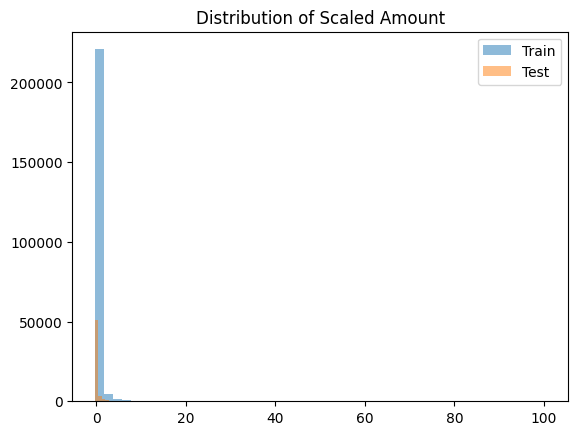

In [14]:
#Inspecting for data leakage
plt.hist(X_train['Amount'], bins=50, alpha=0.5, label='Train')
plt.hist(X_test['Amount'], bins=50, alpha=0.5, label='Test')
plt.legend()
plt.title("Distribution of Scaled Amount")
plt.show()

3. SMOTE (BALANCING THE DATASET USING THE TRAIN DATA)

In [15]:
#Balancing the trainig data because fraud is rare so we need to rebalance the data.
#Creating a pipeline to balance the train data using the RandomUnderSampler and SMOTE methods.
resampled_pipeline = Pipeline([
    ('under', RandomUnderSampler(sampling_strategy = 0.02, random_state = 42)),
    ('over', SMOTE(sampling_strategy = 1.0, random_state=42))
])

#Appling the pipeline to the training data
X_train_resampled, Y_train_rsampled = resampled_pipeline.fit_resample(X_train, Y_train)
print(X_train_resampled.shape, Y_train_rsampled.shape)

(39400, 31) (39400,)


D) MODEL BUILDING AND EVALUATION

In [16]:
#Defining a generic function for RandomizedSearchCV to be used for hyperparameter tuning of the models.
#This function takes in a model, parameter distribution, training data, and other parameters for tuning.
from sklearn.model_selection import RandomizedSearchCV

def tune_model(model, param_dist, X, y, scoring='f1', n_iter=20, cv=3, random_state=42, verbose=1):
    search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=n_iter,
        scoring=scoring,
        cv=cv,
        n_jobs=-1,
        random_state=random_state,
        verbose=verbose
    )

    search.fit(X, y)
    return search.best_estimator_, search.best_params_, search.best_score_

In [17]:
# Defining a generic Function to find the best threshold that maximizes the F1 score.
# This function takes in the true labels, predicted probabilities, and a metric function (default is F1 score).
def find_best_threshold(y_true, y_probs, metric=f1_score):
    best_thresh = 0
    best_score = 0
    for t in np.arange(0.1, 1.01, 0.01):
        preds = (y_probs >= t).astype(int)
        score = metric(y_true, preds)
        if score > best_score:
            best_thresh = t
            best_score = score
    return best_thresh, best_score

1a. Building RandomForestClassifier model

In [18]:
#Using RandomizedSearchCV function above to find the best hyperparameters for the RandomForestClassifier
#Setting the parameter grid for RandomForestClassifier
rf_param_grid = {
    'n_estimators': randint(100, 300),
    'max_depth': [10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

#Fitting the best parameters to train the RandomForestClassifier model
best_rf_model, rf_best_params, rf_score = tune_model(
    RandomForestClassifier(random_state=42),
    param_dist=rf_param_grid,
    X=X_train_resampled,
    y=Y_train_rsampled,
    scoring='f1'
)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [19]:
#Predicting the test data using the trained model
#Get predicted fraud probabilities
Y_pred_proba_rf = best_rf_model.predict_proba(X_test)[:, 1]

#Getting the best threshold for the RandomForestClassifier model
best_thresh_rf, best_score_rf = find_best_threshold(Y_test, Y_pred_proba_rf)
print(f"Best threshold for RF: {best_thresh_rf:.2f} with F1-score: {best_score_rf:.4f}")

#Using the best threshold to make predictions
Y_pred_rf = (Y_pred_proba_rf >= best_thresh_rf).astype(int)

Best threshold for RF: 0.83 with F1-score: 0.8410


In [20]:
# Defining thresholds
thresholds = np.arange(0, 1.01, 0.05)

# Store metrics
rf_data = []

# Calculating metrics at each threshold
for t in thresholds:
    Y_pred_rf_t = (Y_pred_proba_rf >= t).astype(int)
    precision = precision_score(Y_test, Y_pred_rf_t, zero_division=0)
    recall = recall_score(Y_test, Y_pred_rf_t)
    f1 = f1_score(Y_test, Y_pred_rf_t)
    rf_data.append([t, precision, recall, f1])

# Creating a DataFrame
rf_threshold_df = pd.DataFrame(rf_data, columns=["Threshold", "Precision", "Recall", "F1-Score"])
print("Random Forest Threshold Performance Table")
print(rf_threshold_df)

Random Forest Threshold Performance Table
    Threshold  Precision    Recall  F1-Score
0        0.00   0.001720  1.000000  0.003435
1        0.05   0.015289  0.979592  0.030108
2        0.10   0.036145  0.948980  0.069637
3        0.15   0.071885  0.918367  0.133333
4        0.20   0.121253  0.908163  0.213942
5        0.25   0.179959  0.897959  0.299830
6        0.30   0.237838  0.897959  0.376068
7        0.35   0.323420  0.887755  0.474114
8        0.40   0.397260  0.887755  0.548896
9        0.45   0.457895  0.887755  0.604167
10       0.50   0.547170  0.887755  0.677043
11       0.55   0.635036  0.887755  0.740426
12       0.60   0.693548  0.877551  0.774775
13       0.65   0.720339  0.867347  0.787037
14       0.70   0.750000  0.857143  0.800000
15       0.75   0.770642  0.857143  0.811594
16       0.80   0.792453  0.857143  0.823529
17       0.85   0.851064  0.816327  0.833333
18       0.90   0.895349  0.785714  0.836957
19       0.95   0.917808  0.683673  0.783626
20       1.00

b. RandomForestClassifier Model Evaulation

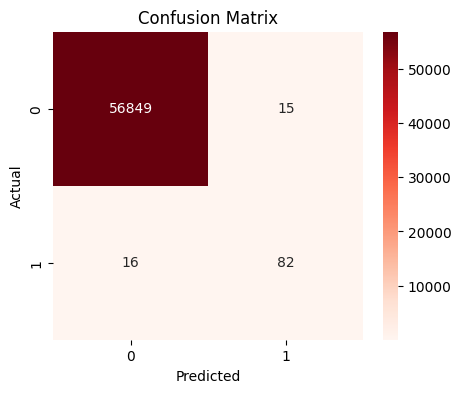

In [21]:
#Evaluating the model using confusion matrix
cm = confusion_matrix(Y_test, Y_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [22]:
#Getting the classification report
print("Classification Report:\n")
print(classification_report(Y_test, Y_pred_rf, digits=4))

Classification Report:

              precision    recall  f1-score   support

           0     0.9997    0.9997    0.9997     56864
           1     0.8454    0.8367    0.8410        98

    accuracy                         0.9995     56962
   macro avg     0.9225    0.9182    0.9204     56962
weighted avg     0.9995    0.9995    0.9995     56962



In [23]:
#Getting the ROC AUC score
roc_auc_rf = roc_auc_score(Y_test, Y_pred_proba_rf)
print(f"ROC AUC Score: {roc_auc_rf:.4f}")

ROC AUC Score: 0.9904


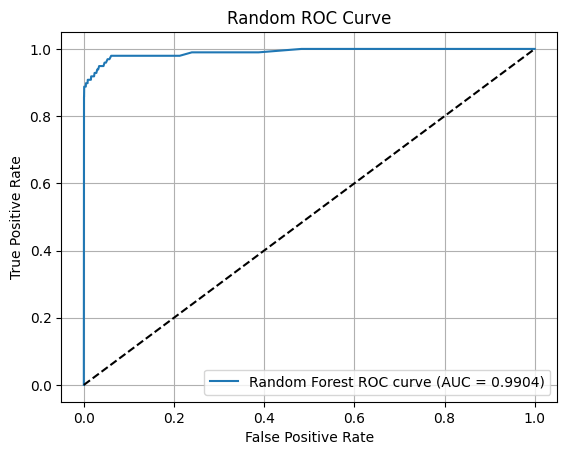

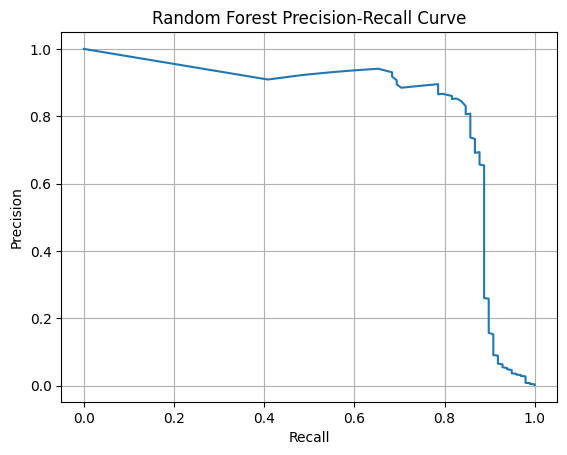

In [24]:
# ROC Curve
fpr, tpr, _ = roc_curve(Y_test, Y_pred_proba_rf)
plt.plot(fpr, tpr, label=f"Random Forest ROC curve (AUC = {roc_auc_rf:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Random ROC Curve')
plt.legend()
plt.grid(True)
plt.show()

# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(Y_test, Y_pred_proba_rf)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Random Forest Precision-Recall Curve')
plt.grid(True)
plt.show()

2a. XGBoost Model Building

In [25]:
#Using RandomizedSearchCV function above to find the best hyperparameters for the XGBoost model
#Setting the parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': randint(100, 300),
    'max_depth': randint(3, 10),
    'learning_rate': uniform(0.01, 0.2),
    'subsample': uniform(0.6, 0.4),
    'colsample_bytree': uniform(0.6, 0.4),
    'scale_pos_weight': [1, 2, 3]
}

#Fitting the best parameters to train the XGBoost model
best_xgb_model, xgb_best_params, xgb_score = tune_model(
    XGBClassifier(eval_metric='auc', random_state=42),
    param_dist=xgb_param_grid,
    X=X_train_resampled,
    y=Y_train_rsampled,
    scoring='f1'
)

Fitting 3 folds for each of 20 candidates, totalling 60 fits


In [26]:
#Predicting the test data using the trained model
#Predicting the the fraud probabilities
Y_pred_proba_xgb = best_xgb_model.predict_proba(X_test)[:, 1]

#Converting the predicted probabilities to binary values using a threshold of 0.75
best_thresh_xgb, best_score_xgb = find_best_threshold(Y_test, Y_pred_proba_xgb)
print(f"Best threshold for XGB: {best_thresh_xgb:.2f} with F1-score: {best_score_xgb:.4f}")

#Using the best threshold to make predictions
Y_pred_xgb = (Y_pred_proba_xgb >= best_thresh_xgb).astype(int)

Best threshold for XGB: 0.99 with F1-score: 0.8394


In [27]:
# Defining thresholds
thresholds = np.arange(0, 1.01, 0.05)

# Store metrics
xgb_data = []

# Calculate metrics at each threshold
for t in thresholds:
    Y_pred_xgb_t = (Y_pred_proba_xgb >= t).astype(int)
    precision = precision_score(Y_test, Y_pred_xgb_t, zero_division=0)
    recall = recall_score(Y_test, Y_pred_xgb_t)
    f1 = f1_score(Y_test, Y_pred_xgb_t)
    xgb_data.append([t, precision, recall, f1])

# Create DataFrame
xgb_threshold_df = pd.DataFrame(xgb_data, columns=["Threshold", "Precision", "Recall", "F1-Score"])
print("XGBoost Threshold Performance Table")
print(xgb_threshold_df)


XGBoost Threshold Performance Table
    Threshold  Precision    Recall  F1-Score
0        0.00   0.001720  1.000000  0.003435
1        0.05   0.118710  0.938776  0.210767
2        0.10   0.165428  0.908163  0.279874
3        0.15   0.204176  0.897959  0.332703
4        0.20   0.239782  0.897959  0.378495
5        0.25   0.261128  0.897959  0.404598
6        0.30   0.290429  0.897959  0.438903
7        0.35   0.322344  0.897959  0.474394
8        0.40   0.350598  0.897959  0.504298
9        0.45   0.375000  0.887755  0.527273
10       0.50   0.393665  0.887755  0.545455
11       0.55   0.420290  0.887755  0.570492
12       0.60   0.460317  0.887755  0.606272
13       0.65   0.488636  0.877551  0.627737
14       0.70   0.512048  0.867347  0.643939
15       0.75   0.562914  0.867347  0.682731
16       0.80   0.582192  0.867347  0.696721
17       0.85   0.634328  0.867347  0.732759
18       0.90   0.685950  0.846939  0.757991
19       0.95   0.761468  0.846939  0.801932
20       1.00   0.0

2b) XGBoost Model Evaluation

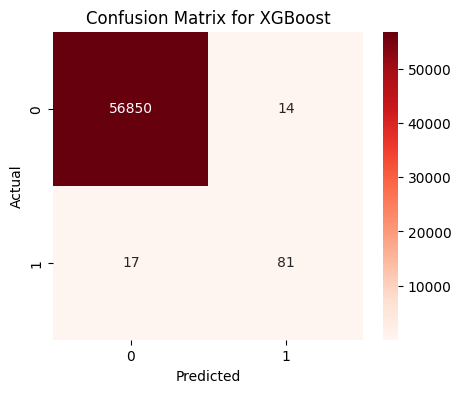

In [28]:
#Evaluating the XGBoost model
#Confusion matrix
cm_xgb = confusion_matrix(Y_test, Y_pred_xgb)

#Plotting the confusion matrix for XGBoost
plt.figure(figsize=(5,4))
sns.heatmap(cm_xgb, annot=True, fmt='d', cmap='Reds')
plt.title("Confusion Matrix for XGBoost")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [29]:
#Classification report for XGBoost
print("Classification Report for XGBoost:\n")
print(classification_report(Y_test, Y_pred_xgb, digits=4))

Classification Report for XGBoost:

              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     56864
           1     0.8526    0.8265    0.8394        98

    accuracy                         0.9995     56962
   macro avg     0.9262    0.9131    0.9196     56962
weighted avg     0.9994    0.9995    0.9995     56962



In [30]:
#ROC AUC score for XGBoost
roc_auc_xgb = roc_auc_score(Y_test, Y_pred_proba_xgb)
print(f"ROC AUC Score for XGBoost: {roc_auc_xgb:.4f}")

ROC AUC Score for XGBoost: 0.9900


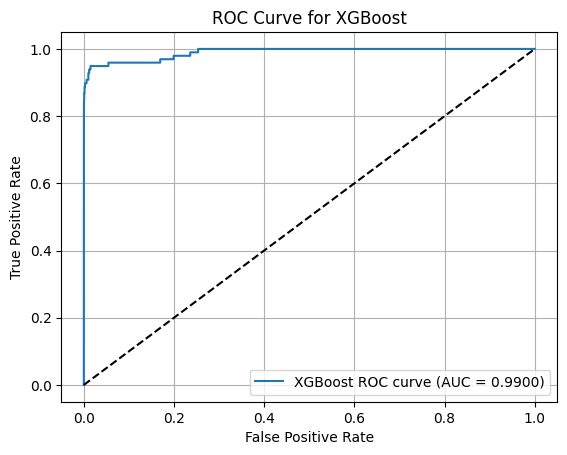

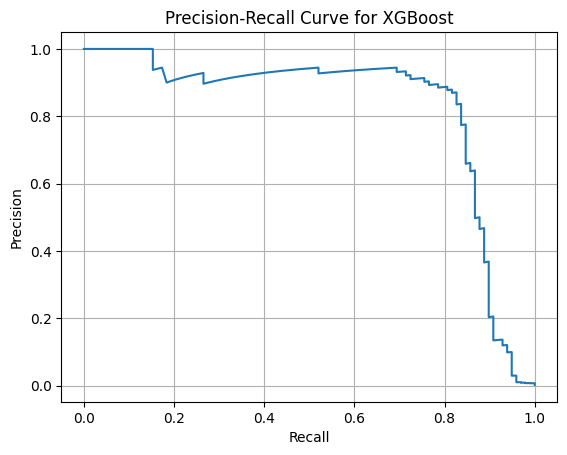

In [31]:
# ROC Curve for the XGBoost model
fpr_tuned, tpr_tuned, _ = roc_curve(Y_test, Y_pred_proba_xgb)
plt.plot(fpr_tuned, tpr_tuned, label=f"XGBoost ROC curve (AUC = {roc_auc_xgb:.4f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for XGBoost')
plt.legend()
plt.grid(True)
plt.show()

#Precision-Recall Curve for the tuned model
precision_tuned, recall_tuned, _ = precision_recall_curve(Y_test, Y_pred_proba_xgb)
plt.plot(recall_tuned, precision_tuned)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve for XGBoost')
plt.grid(True)
plt.show()

In [32]:
#Final evaluation of the models
# Random Forest
rf_precision = precision_score(Y_test, Y_pred_rf)
rf_recall = recall_score(Y_test, Y_pred_rf)
rf_f1 = f1_score(Y_test, Y_pred_rf)
rf_auc = roc_auc_score(Y_test, Y_pred_proba_rf)

# XGBoost
xgb_precision = precision_score(Y_test, Y_pred_xgb)
xgb_recall = recall_score(Y_test, Y_pred_xgb)
xgb_f1 = f1_score(Y_test, Y_pred_xgb)
xgb_auc = roc_auc_score(Y_test, Y_pred_proba_xgb)

# Creating a DataFrame to compare the models
results_df = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'Threshold': [best_thresh_rf, best_thresh_xgb],
    'Precision (Fraud)': [rf_precision, xgb_precision],
    'Recall (Fraud)': [rf_recall, xgb_recall],
    'F1 Score (Fraud)': [rf_f1, xgb_f1],
    'ROC AUC Score (Fraud)': [rf_auc, xgb_auc]
})

# Displaying the results
results_df.set_index('Model', inplace=True)
results_df

,Threshold,Precision (Fraud),Recall (Fraud),F1 Score (Fraud),ROC AUC Score (Fraud)
Model,,,,,
Random Forest,0.83,0.845361,0.836735,0.841026,0.990427
XGBoost,0.99,0.852632,0.826531,0.839378,0.990015


In [33]:
print(results_df.columns)

Index(['Threshold', 'Precision (Fraud)', 'Recall (Fraud)', 'F1 Score (Fraud)',
       'ROC AUC Score (Fraud)'],
      dtype='object')


<Figure size 1000x600 with 0 Axes>

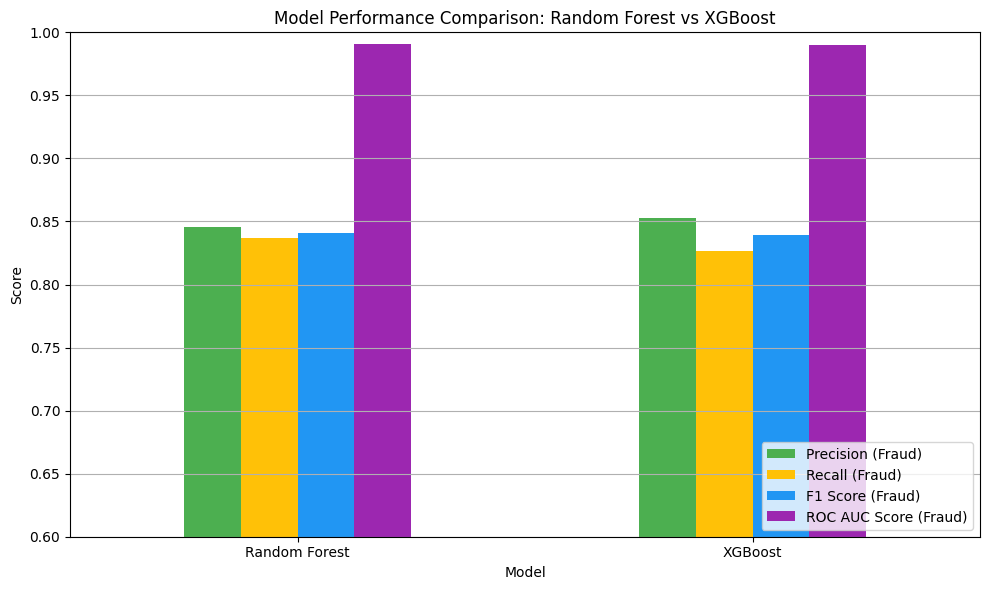

In [34]:
#Visualizing the results
# Set the model names as index for easier plotting
results_df['Model'] = ['Random Forest', 'XGBoost']
results_df.set_index('Model', inplace=True)

# Plot bar chart for each metric
plt.figure(figsize=(10, 6))
results_df[['Precision (Fraud)', 'Recall (Fraud)', 'F1 Score (Fraud)', 'ROC AUC Score (Fraud)']].plot(
    kind='bar',
    figsize=(10, 6),
    color=['#4CAF50', '#FFC107', '#2196F3', '#9C27B0']
)
plt.title('Model Performance Comparison: Random Forest vs XGBoost')
plt.ylabel('Score')
plt.ylim(0.6, 1.0)
plt.grid(axis='y')
plt.xticks(rotation=0)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()

In [35]:
#Creating a Multi-Threshold Strategy
#This function takes in the true labels, predicted probabilities, and a list of thresholds.
# It returns a DataFrame with the precision, recall, and F1 score for each threshold.
def classify_action(score):
    if score >= 0.90:
        return "Auto-Block"
    elif score >= 0.75:
        return "Flag for Review"
    elif score >= 0.50:
        return "Soft Flag"
    else:
        return "Allow"

# Creating a dataframe for predictions and true labels
multi_thresh_df = pd.DataFrame({
    'Fraud_Probability': Y_pred_proba_xgb,
    'True_Label': Y_test.values
})

# Applying the actions classification
multi_thresh_df['Action'] = multi_thresh_df['Fraud_Probability'].apply(classify_action)


In [36]:
# Counting how many transactions fall into each action category
print("Overall Action Breakdown:")
print(multi_thresh_df['Action'].value_counts())

#How many actual frauds are in each category?
fraud_decisions = multi_thresh_df[multi_thresh_df['True_Label'] == 1]['Action'].value_counts()
print("\nFraud Cases by Action Category:")
print(fraud_decisions)


Overall Action Breakdown:
Action
Allow              56741
Auto-Block           121
Soft Flag             70
Flag for Review       30
Name: count, dtype: int64

Fraud Cases by Action Category:
Action
Auto-Block         83
Allow              11
Soft Flag           2
Flag for Review     2
Name: count, dtype: int64


In [37]:
#Function to preproces the input data for the model
#This function takes in a DataFrame and a fitted scaler, scales the 'Time' and 'Amount' columns,
def preprocess_input(df, scaler):
    """
    Preprocesses incoming fraud transaction data to match model training format.
    
    Parameters:
        df (pd.DataFrame): Input data with columns ['Time', 'V1'...'V28', 'Amount']
        scaler (StandardScaler): Fitted scaler used for 'Amount' and 'Time'

    Returns:
        pd.DataFrame: Scaled and ordered feature set ready for model prediction, including 'Hour'
    """
    df = df.copy()

    # Define expected columns without Hour (we'll add it)
    expected_base_columns = ['Time'] + [f'V{i}' for i in range(1, 29)] + ['Amount']

    # Check required base columns
    if not all(col in df.columns for col in expected_base_columns):
        raise ValueError("Input data must contain: " + ", ".join(expected_base_columns))

    # Scale 'Time' and 'Amount'
    df[['Time', 'Amount']] = scaler.transform(df[['Time', 'Amount']])

    # Reconstruct Hour from unscaled Time
    # Time_unscaled = scaled_time * std + mean
    time_unscaled = df['Time'] * scaler.scale_[0] + scaler.mean_[0]
    df['Hour'] = (time_unscaled // 3600).astype(int)

    # Define final expected column order
    expected_columns = expected_base_columns + ['Hour']
    df = df[expected_columns]

    return df


In [38]:
#Wrting a sequestial function to predict the fraud probability of a new transaction using the two trained models
def sequential_predict(input_df, rf_model, xgb_model, scaler):
    """
    Makes a fraud prediction using Random Forest and confirms with XGBoost if necessary.

    Parameters:
        input_df (pd.DataFrame): Raw transaction input (one or more rows)
        rf_model: Trained Random Forest model
        xgb_model: Trained XGBoost model
        scaler: Fitted StandardScaler used during training

    Returns:
        pd.DataFrame with fraud scores and recommended actions
    """
    # Preprocessing the input
    processed = preprocess_input(input_df, scaler)

    # Getting RF and XGB fraud scores
    rf_scores = rf_model.predict_proba(processed)[:, 1]
    xgb_scores = xgb_model.predict_proba(processed)[:, 1]

    # Applying the sequential logic
    decisions = []
    for rf_score, xgb_score in zip(rf_scores, xgb_scores):
        if rf_score >= 0.83:
            if xgb_score >= 0.99:
                decisions.append("Auto-Block")
            else:
                decisions.append("Flag for Review")
        else:
            decisions.append("Allow")

    # Return input with scores and decisions
    result = input_df.copy()
    result["RF_Fraud_Prob"] = rf_scores
    result["XGB_Fraud_Prob"] = xgb_scores
    result["Decision"] = decisions

    return result

In [39]:
import joblib
joblib.dump(best_rf_model, "rf_model.pkl")
joblib.dump(best_xgb_model, "xgb_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']